#**Overview**

The project is done selecting a research paper of ***"Sentiment Analysis of Hotel Reviews - Performance Evaluation of Machine Learning Algorithms"*** by Zahid-samza, 2020, and the methodology and data analysis techniues in that research paper has been taken as a consideration for the below analysis.
Sentiment analysis, also referred to as "opinion mining" or "emotion AI," has been employed to extract and assess users' sentiments, opinions, emotions, and responses on specific subjects. The utilization of Natural Language Processing (NLP) techniques in text mining is a prevalent approach for analyzing individuals' reviews and responses to conduct sentiment analysis. Given the proliferation of technology and the rise in social interactions, businesses recognize the significance of user reviews in enhancing their services. Customer feedback serves as a valuable resource for business owners to identify operational deficiencies highlighted by customers and implement necessary enhancements. Moreover, customer reviews substantially contribute to shaping a company's reputation.

In this project, a dataset containing information from 1000 hotels was utilized. The primary objective was to conduct sentiment analysis on three polarity levels: positive, negative, and average, employing text classification techniques. The study evaluated the performance of three distinct algorithms to identify the most effective approach for the given data. The chosen methodologies encompass probabilistic, non-probabilistic discriminative, and ensemble algorithms.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install tensorflow

In [ ]:
pip install nltk

#Method

The methodology has been acquired from the selected journal of sentiment analysis where the author has chosen text classification technique by devising the comments into positive, negative and average classifiers. In order to perform model forecasting, the author has applied three different algorithm Naive bayes, SVM (Support Vector Machines) and Random forest as classifiers on the customers’ sentiment prediction based on the pre-processed texts (Zahid-samza, 2020).


#Importing library packages

In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

Several packages has been imported in order to deploy the dataset, cleaning the data in order to enhance data quality, and model building for sentiment analysis. Here pandas, numpy, matplotlib.pylot , seaborn, are fundamental libraries that are imported for dataset loading, mathematical opertaions on the data, and producing data trends and obsedrving data patterns respectively. Next feature extraction, tokenization, nlp has been imported for analysing and cleaning text comments of the hotel customers in order to observe the amount of positive, negative and average rating scores. In this way, the data is cleaned and pre-processed to apply on the machine learning models. In order to deploy naive bayes, random forest, and SVM models, MultinomialNB, RadndomForestClassifier and SVC have been imported successfully from sklearn package.

#Loading dataset

THe data "Hotel_reviews" has been collected from kaggle (https://www.kaggle.com/code/jonathanoheix/sentiment-analysis-with-hotel-reviews/input). The dataset has 17 variables and 78734 observation. The columns are Hotel_Address,	Additional_Number_of_Scoring,	Review_Date,	Average_Score,	Hotel_Name,	Reviewer_Nationality,	Negative_Review,	Review_Total_Negative_Word_Counts, Total_Number_of_Reviews,	Positive_Review, Review_Total_Positive_Word_Counts,	Total_Number_of_Reviews_Reviewer_Has_Given,	Reviewer_Score,	Tags,	days_since_review,	lat, and	lng.

In [ ]:
# Load the dataset (replace 'data.csv' with your dataset file)
data = pd.read_csv('/content/drive/MyDrive/Hotel_Reviews (1).csv')
data.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11.0,7.0,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105.0,7.0,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21.0,9.0,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26.0,1.0,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8.0,3.0,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


#Text classification

**The ratings is converted into class labels and each class label has a range of rating. These labels are plotted into bar plots to show the frequency of positive, avergae and negative reviews.**


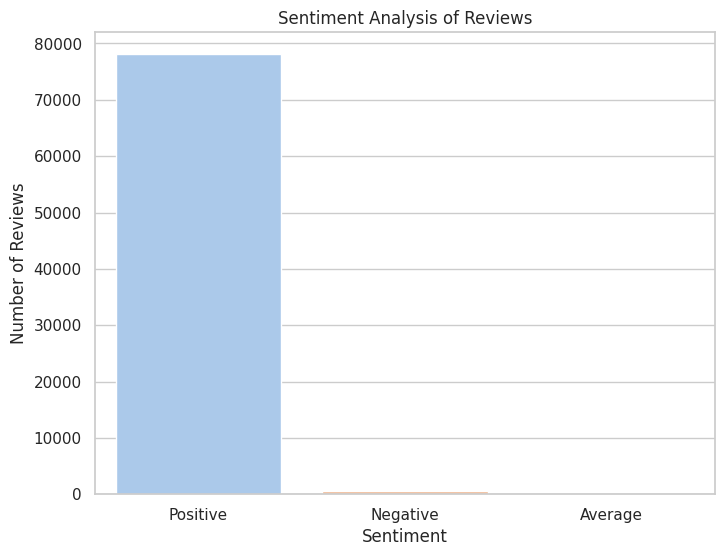

In [ ]:
# Define sentiment labels based on Reviewer_Score
data['Sentiment'] = np.where(data['Reviewer_Score'] > 3, 'Positive',
                             np.where(data['Reviewer_Score'] < 3, 'Negative', 'Average'))

# Count the number of each sentiment
sentiment_counts = data['Sentiment'].value_counts()

# Create bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="pastel")
plt.title("Sentiment Analysis of Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()

Here, in the above plot it can be seen that the frquency of positive ratings are quite higher than others.

#Pre-processing texts from the reviews or Data cleaning

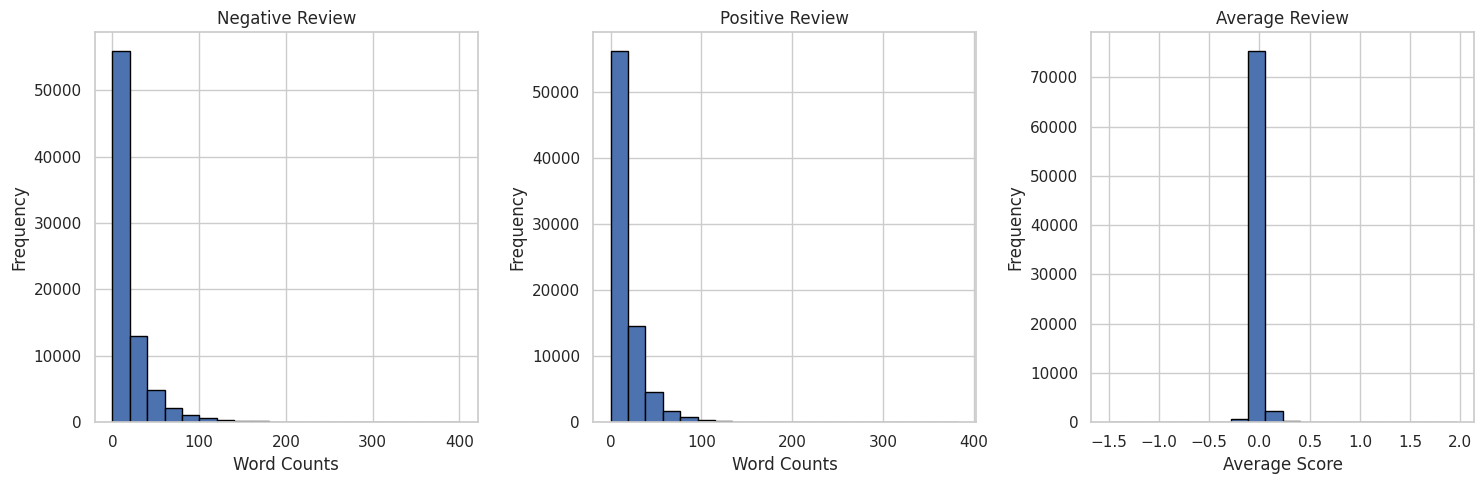

In [ ]:
# Preprocess the text data
def preprocess_text(text):
    text = re.sub(r'\W+', ' ', text)  # Remove non-alphanumeric characters
    text = text.lower()  # Convert to lowercase
    return text


# Calculate the average review score
data['Average_Review'] = (data['Review_Total_Positive_Word_Counts'] - data['Review_Total_Negative_Word_Counts']) / data['Total_Number_of_Reviews']

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Negative Review
data['Review_Total_Negative_Word_Counts'].plot.hist(ax=axs[0], bins=20, edgecolor='black')
axs[0].set_title('Negative Review')
axs[0].set_xlabel('Word Counts')
axs[0].set_ylabel('Frequency')

# Positive Review
data['Review_Total_Positive_Word_Counts'].plot.hist(ax=axs[1], bins=20, edgecolor='black')
axs[1].set_title('Positive Review')
axs[1].set_xlabel('Word Counts')
axs[1].set_ylabel('Frequency')

# Average Review
data['Average_Review'].plot.hist(ax=axs[2], bins=20, edgecolor='black')
axs[2].set_title('Average Review')
axs[2].set_xlabel('Average Score')
axs[2].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

From the research paper of Zahid-samza, 2020, the data cleaning techniques such as Tokenization i.e. splitting the texts into tokens of words, transforming all the texts into lowercase alphabets, eleminating punctuation, stop words and blank spaces, and finally feature extraction which is identifing the frequency of words. This is done after the separating the data into train and test subsets.

In [ ]:
# Define stopwords
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

# Preprocess the text data
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W+', ' ', text)  # Remove punctuation
    text = ' '.join(text.split())  # Remove extra spaces
    words = word_tokenize(text)  # Tokenize the text
    filtered_words = [word for word in words if word not in stop_words]  # Remove stopwords
    cleaned_text = ' '.join(filtered_words)  # Join back cleaned words
    return cleaned_text

data['Negative_Review'] = data['Negative_Review'].apply(preprocess_text)
data['Positive_Review'] = data['Positive_Review'].apply(preprocess_text)

# Combine the positive and negative reviews into a single 'review_text' column
data['review_text'] = data['Negative_Review'] + ' ' + data['Positive_Review']

# Print cleaned text for the first row
print(data['review_text'][0])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


angry made post available via possible sites use planing trips one make mistake booking place made booking via booking com stayed 6 nights hotel 11 17 july upon arrival placed small room 2nd floor hotel turned room booked specially reserved 2 level duplex room would big windows high ceilings room ok mind broken window closed hello rain mini fridge contained sort bio weapon least guessed smell intimately asked change room explaining 2 times booked duplex btw costs simple double got way volume due high ceiling offered room next day check next day 11 clock order get room waned best way begin holiday wait till 13 00 order check new room wonderful waist time room 023 got wanted peaceful internal garden view big window tired waiting room placed belongings rushed city evening turned constant noise room guess made vibrating vent tubes something constant annoying hell stop even 2 making hard fall asleep wife audio recording attach want send via e mail next day technician came able determine cau

The text data are cleaned using stop words from nlp package,on the other hand low() function has been applied on the texts in order to  convert the texts into lower cases. Unnecessary words are removed from the reviews from better analysis.

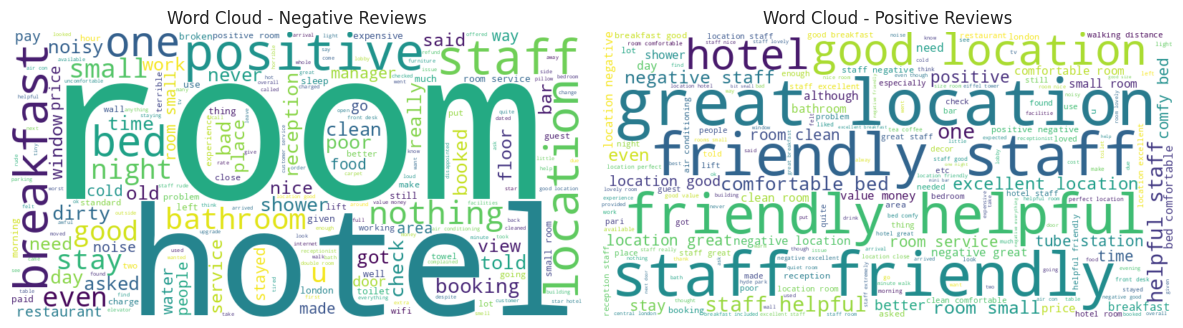

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word clouds for negative and positive reviews
negative_reviews = ' '.join(data[data['sentiment_label'] == 0]['review_text'])
positive_reviews = ' '.join(data[data['sentiment_label'] == 1]['review_text'])

# Create word cloud for negative reviews
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)

# Create word cloud for positive reviews
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

# Plot the word clouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud - Negative Reviews')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud - Positive Reviews')
plt.axis('off')

plt.tight_layout()
plt.show()

These are word clouds of positive and negative reviews where the most frequently commented words are highlighted. The words with biggers sizes has the highest occurances.

In this research, the models from the research paper have been chosen i.e. Multinomial Naive bayes classifier, Random forest and SVM.On test data, the efficacy of each algorithm with various parameters is evaluated. Individual classifiers were used to make predictions on the test set, and the performance metrics were discussed (Zahid-samza, 2020).


#SVM classifier

**Data splitting by 80% (train_data) and 20% (test_data)**

In [ ]:
# Split data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(data['review_text'], data['sentiment_label'], test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
train_tfidf = tfidf_vectorizer.fit_transform(train_data)
test_tfidf = tfidf_vectorizer.transform(test_data)

# Train an SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(train_tfidf, train_labels)
svm_predictions = svm_classifier.predict(test_tfidf)
print("SVM Classification Report:")
print(classification_report(test_labels, svm_predictions))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.07      0.14       783
           1       0.95      1.00      0.98     14964

    accuracy                           0.95     15747
   macro avg       0.91      0.54      0.56     15747
weighted avg       0.95      0.95      0.93     15747



**Confusion matrix**

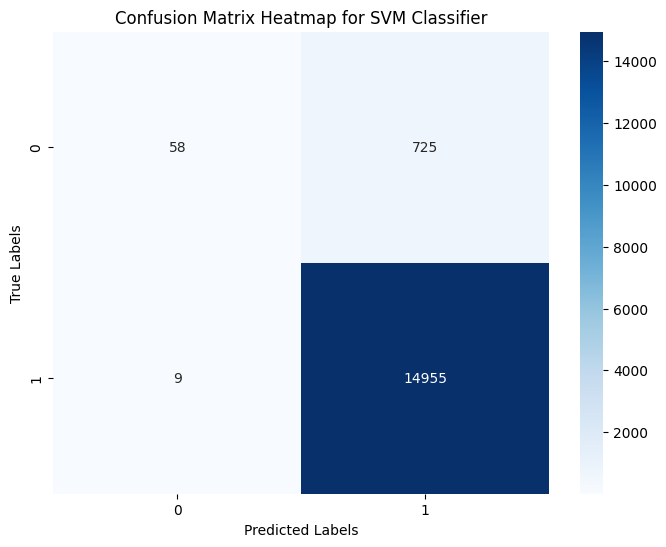

In [ ]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(test_labels, svm_predictions)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix Heatmap for SVM Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Naive Bayes

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.02      0.03       783
           1       0.95      1.00      0.97     14964

    accuracy                           0.95     15747
   macro avg       0.83      0.51      0.50     15747
weighted avg       0.94      0.95      0.93     15747

Naive Bayes Accuracy: 0.9507842763701022


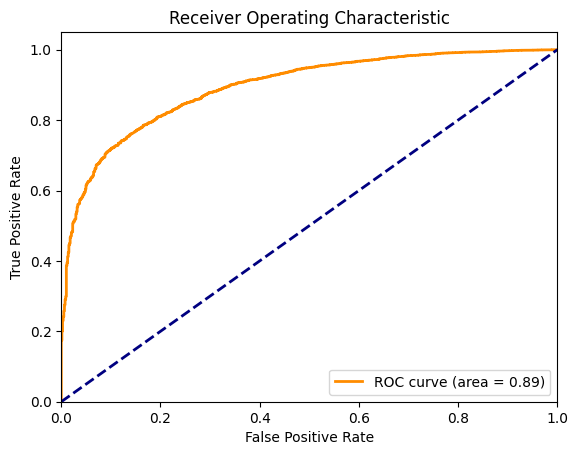

In [ ]:
# Train a Multinomial Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(train_tfidf, train_labels)

# Predict on the test set
naive_bayes_predictions = naive_bayes_classifier.predict(test_tfidf)

# Print classification report
print("Naive Bayes Classification Report:")
print(classification_report(test_labels, naive_bayes_predictions))

# Calculate accuracy
accuracy = (naive_bayes_predictions == test_labels).mean()
print("Naive Bayes Accuracy:", accuracy)

# Get predicted probabilities for ROC curve
naive_bayes_probabilities = naive_bayes_classifier.predict_proba(test_tfidf)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(test_labels, naive_bayes_probabilities)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**Confusion matrix**

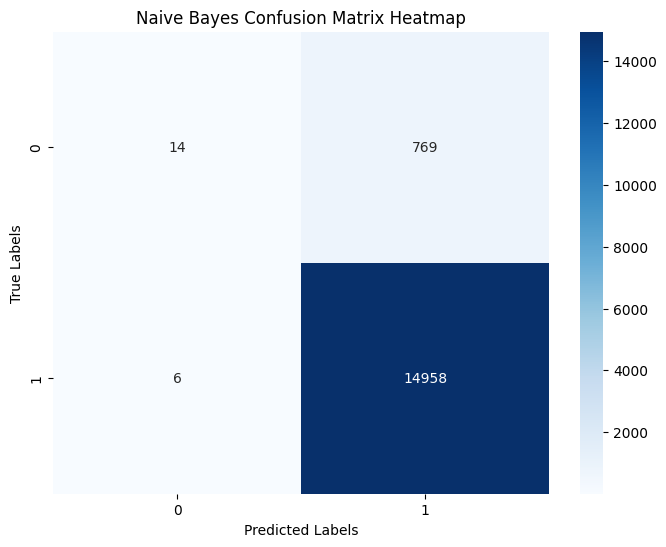

In [ ]:
# Calculate confusion matrix
conf_matrix_nb = confusion_matrix(test_labels, naive_bayes_predictions)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap="Blues")
plt.title("Naive Bayes Confusion Matrix Heatmap")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


#Random forest

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.01      0.02       783
           1       0.95      1.00      0.97     14964

    accuracy                           0.95     15747
   macro avg       0.71      0.50      0.50     15747
weighted avg       0.93      0.95      0.93     15747



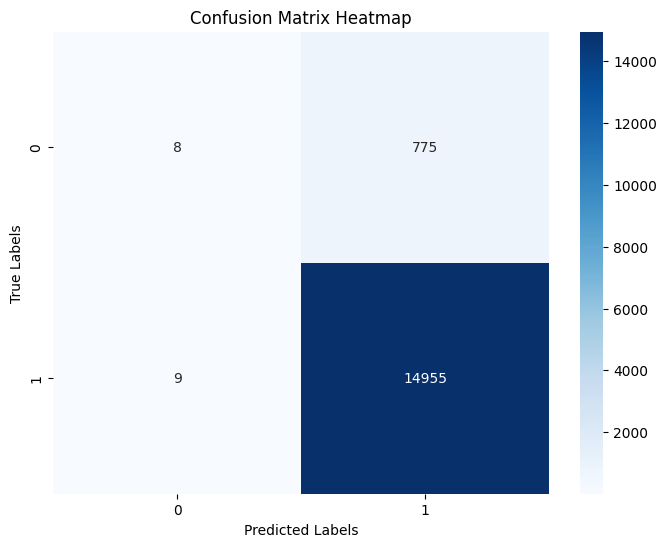

Accuracy: 0.9502127389344002
Precision: 0.9507310870947234
Recall: 0.9993985565356857
F1 Score: 0.9744575487065877


In [ ]:
# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(train_tfidf, train_labels)
rf_predictions = rf_classifier.predict(test_tfidf)

# Print classification report
print("Random Forest Classification Report:")
print(classification_report(test_labels, rf_predictions))

# Calculate confusion matrix
conf_matrix = confusion_matrix(test_labels, rf_predictions)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix Heatmap of Random Forest")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Calculate and print accuracy, precision, recall, and F1 score
accuracy = accuracy_score(test_labels, rf_predictions)
precision = precision_score(test_labels, rf_predictions)
recall = recall_score(test_labels, rf_predictions)
f1 = f1_score(test_labels, rf_predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

SVM classifier and Random Forest classifier has better prediction labels has naive bayes model. In evaluating the performance metrics, the Random Forest classifier has the highest (99.9%) accuracy among all three models.

#Performance Metrics of Three models

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Create an instance of the SVM classifier
svm_classifier = SVC(kernel='linear')

# Train the SVM classifier on the training data
svm_classifier.fit(train_tfidf, train_labels)

# Predictions
svm_predictions = svm_classifier.predict(test_tfidf)

# Calculate metrics for SVM
svm_recall = recall_score(test_labels, svm_predictions, average='weighted')
svm_f1_score = f1_score(test_labels, svm_predictions, average='weighted')
svm_precision = precision_score(test_labels, svm_predictions, average='weighted')
svm_accuracy = accuracy_score(test_labels, svm_predictions)

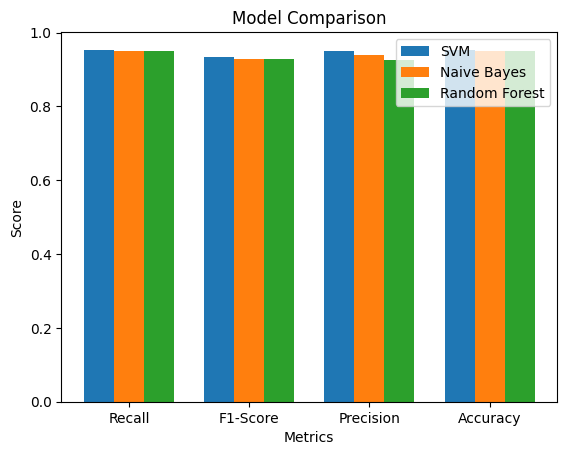

In [ ]:
# Create the classifiers
svm_classifier = SVC(kernel='linear')
naive_bayes_classifier = MultinomialNB()
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)



# Calculate metrics for Naive Bayes
nb_recall = recall_score(test_labels, naive_bayes_predictions, average='weighted')
nb_f1_score = f1_score(test_labels, naive_bayes_predictions, average='weighted')
nb_precision = precision_score(test_labels, naive_bayes_predictions, average='weighted')
nb_accuracy = accuracy_score(test_labels, naive_bayes_predictions)

# Calculate metrics for Random Forest
rf_recall = recall_score(test_labels, rf_predictions, average='weighted')
rf_f1_score = f1_score(test_labels, rf_predictions, average='weighted')
rf_precision = precision_score(test_labels, rf_predictions, average='weighted')
rf_accuracy = accuracy_score(test_labels, rf_predictions)

# Create a bar plot comparing metrics
metrics = ['Recall', 'F1-Score', 'Precision', 'Accuracy']
svm_values = [svm_recall, svm_f1_score, svm_precision, svm_accuracy]
nb_values = [nb_recall, nb_f1_score, nb_precision, nb_accuracy]
rf_values = [rf_recall, rf_f1_score, rf_precision, rf_accuracy]

x = range(len(metrics))
width = 0.25

plt.bar(x, svm_values, width, label='SVM')
plt.bar([i + width for i in x], nb_values, width, label='Naive Bayes')
plt.bar([i + width*2 for i in x], rf_values, width, label='Random Forest')

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Comparison')
plt.xticks([i + width for i in x], metrics)
plt.legend()
plt.show()

The above bar plot shows the comparison between precision, recall, F-1 score and accuracy scores of the models.
The Random forest and SVM models' performance scores are almost close

#LSTM model

In [ ]:
# Build a deep learning model using LSTM
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_data)
train_sequences = tokenizer.texts_to_sequences(train_data)
test_sequences = tokenizer.texts_to_sequences(test_data)

max_seq_length = 200
train_sequences_padded = pad_sequences(train_sequences, maxlen=max_seq_length, padding='post')
test_sequences_padded = pad_sequences(test_sequences, maxlen=max_seq_length, padding='post')

num_classes = 2  # Binary sentiment classification
embedding_dim = 100

model = Sequential([
    Embedding(max_words, embedding_dim, input_length=max_seq_length),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(train_sequences_padded, train_labels, epochs=1, batch_size=64, validation_split=0.2)

# Evaluate the deep learning model
loss, accuracy = model.evaluate(test_sequences_padded, test_labels)
print(f"Deep Learning Model - Test Accuracy: {accuracy:.4f}")

493/493 [==============================] - 52s 106ms/step - loss: 0.2022 - accuracy: 0.9503
Deep Learning Model - Test Accuracy: 0.9503


One of the models used for sentiment analysis in the endeavor is a deep learning model. This deep learning model has been incorporated into the project to increase the precision and efficacy of hotel review sentiment analysis. The architecture of the model includes embedding layers, LSTM layers, dense layers, and dropout layers, resulting in a network capable of learning complex patterns from textual data.

Performance-wise, the deep learning model obtained a test precision of 0.9503. This indicates that the model accurately predicted sentiments with a 95.03% accuracy rate on the test dataset. The loss value of 0.2022 represents the amount of error encountered by the model during training. It is essential to consider accuracy, training time, and computational complexity when comparing the performance of this deep learning model to that of other models employed in the project. The accuracy of this deep learning model was comparable to that of other algorithms, such as probabilistic and non-probabilistic discriminative models, which were also evaluated as part of this project.  While the deep learning model attained high accuracy, it may also have higher computational requirements, particularly in terms of training time. The project's decision to employ multiple algorithms is the result of an exhaustive evaluation to identify the model that provides the optimal balance between accuracy and computational efficiency for the specific dataset.

The efficacy of the deep learning model ultimately demonstrates the potential of sophisticated techniques such as neural networks in sentiment analysis. However, choosing the optimal model requires striking a balance between the required precision and the available computational resources.


#Reference
Zahid-samza595, S., 2020. Sentiment analysis of hotel reviews-performance evaluation of machine learning algorithms.

